<a href="https://colab.research.google.com/github/vktorbr/Heart-Failure-Prediction/blob/main/ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-multilearn --quiet

     |████████████████████████████████| 89 kB 3.3 MB/s 


In [1]:
!pip install matplotlib --upgrade --quiet

     |████████████████████████████████| 10.3 MB 4.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
#importacao de bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split


In [2]:
#carregando dataset
df = pd.read_csv('https://raw.githubusercontent.com/vktorbr/Heart-Failure-Prediction/main/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#informacao estatistica basica do dataset
df.describe()

In [ ]:
#informacoes sobre o dataset
df.info()

In [3]:
y = df['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [4]:
X = df.drop('DEATH_EVENT', axis=1)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [5]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [28]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((239, 12), (239,)), ((60, 12), (60,)))

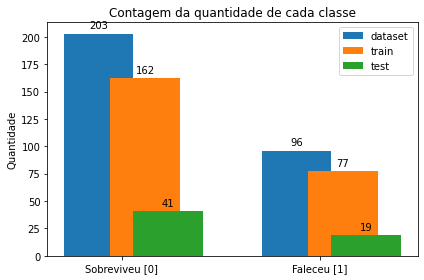

In [6]:
import matplotlib.pyplot as plt

labels = ["Sobreviveu [0]", "Faleceu [1]"]

qt_y = np.unique(y, return_counts=True)[1]
qt_y_train = np.unique(y_train, return_counts=True)[1]
qt_y_test = np.unique(y_test, return_counts=True)[1]

x_bar = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x_bar - width/3, qt_y, width, label='dataset')
rects2 = ax.bar(x_bar + width/3, qt_y_train, width, label='train')
rects3 = ax.bar(x_bar + 2 * (width/3), qt_y_test, width, label='test')

ax.set_ylabel('Quantidade')
ax.set_title('Contagem da quantidade de cada classe')
ax.set_xticks(x_bar)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

Proporção mantida após a estratificação do dataset em treinamento e teste

In [7]:
total_data = sum(qt_y)
total_train = sum(qt_y_train)
total_test = sum(qt_y_test)

prop_data_sobreviveu = qt_y[0] / total_data
prop_data_faleceu = qt_y[1] / total_data

prop_train_sobreviveu = qt_y_train[0] / total_train
prop_train_faleceu = qt_y_train[1] / total_train

prop_test_sobreviveu = qt_y_test[0] / total_test
prop_test_faleceu = qt_y_test[1] / total_test

data = {
    'Sobreviveu [0]': [prop_data_sobreviveu, prop_train_sobreviveu, prop_test_sobreviveu],
    'Faleceu [1]': [prop_data_faleceu, prop_train_faleceu, prop_test_faleceu]
}

df_prop = pd.DataFrame(data, index=['dataset', 'train_set', 'test_set'])

df_prop

,Sobreviveu [0],Faleceu [1]
dataset,0.678930,0.321070
train_set,0.677824,0.322176
test_set,0.683333,0.316667


## Árvore de Decisão

In [8]:
#instanciando o classificador
clf = DecisionTreeClassifier()

In [9]:
#treinando o modelo
clf = clf.fit(X_train, y_train)

In [10]:
resultado_train = clf.predict(X_train)

print(metrics.classification_report(y_train, resultado_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        77

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



Melhor Árvore de Decisão
('Criterio:', 'gini', ' | ', 'Splitter:', 'random', ' | ', 'Max_depth:', 10, ' | ', 'min_samples_split:', 2, ' | ', 'min_samples_leaf:', 1)
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        41
           1       0.92      0.58      0.71        19

    accuracy                           0.85        60
   macro avg       0.88      0.78      0.80        60
weighted avg       0.86      0.85      0.84        60



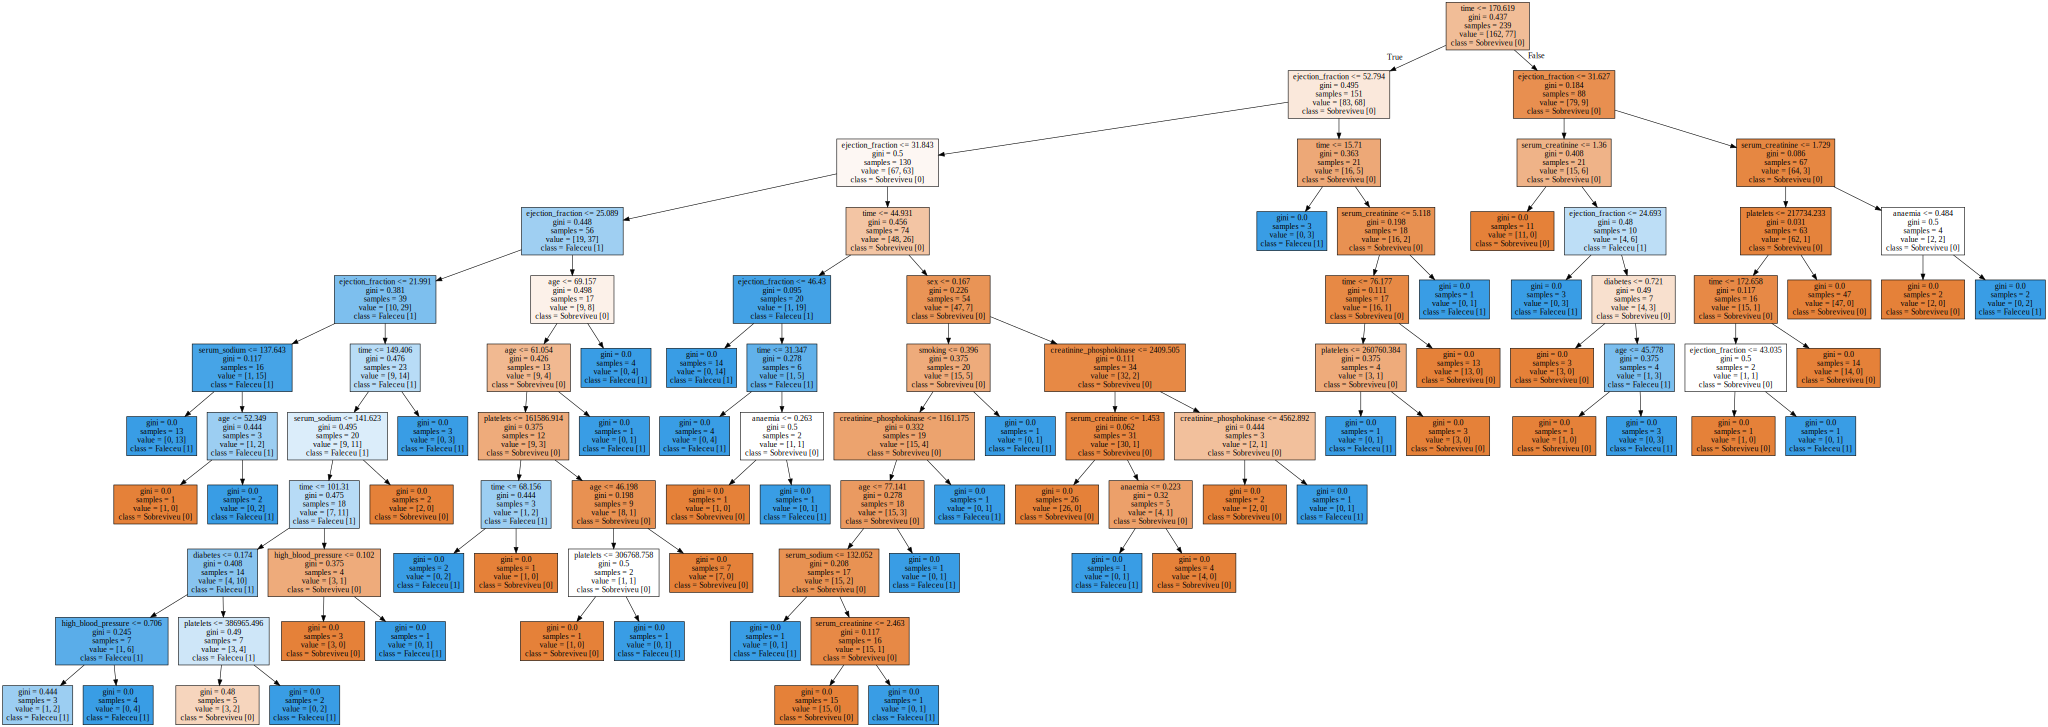

Pior Árvore de Decisão
('Criterio:', 'gini', ' | ', 'Splitter:', 'random', ' | ', 'Max_depth:', None, ' | ', 'min_samples_split:', 2, ' | ', 'min_samples_leaf:', 1)
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.47      0.42      0.44        19

    accuracy                           0.67        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.66      0.67      0.66        60



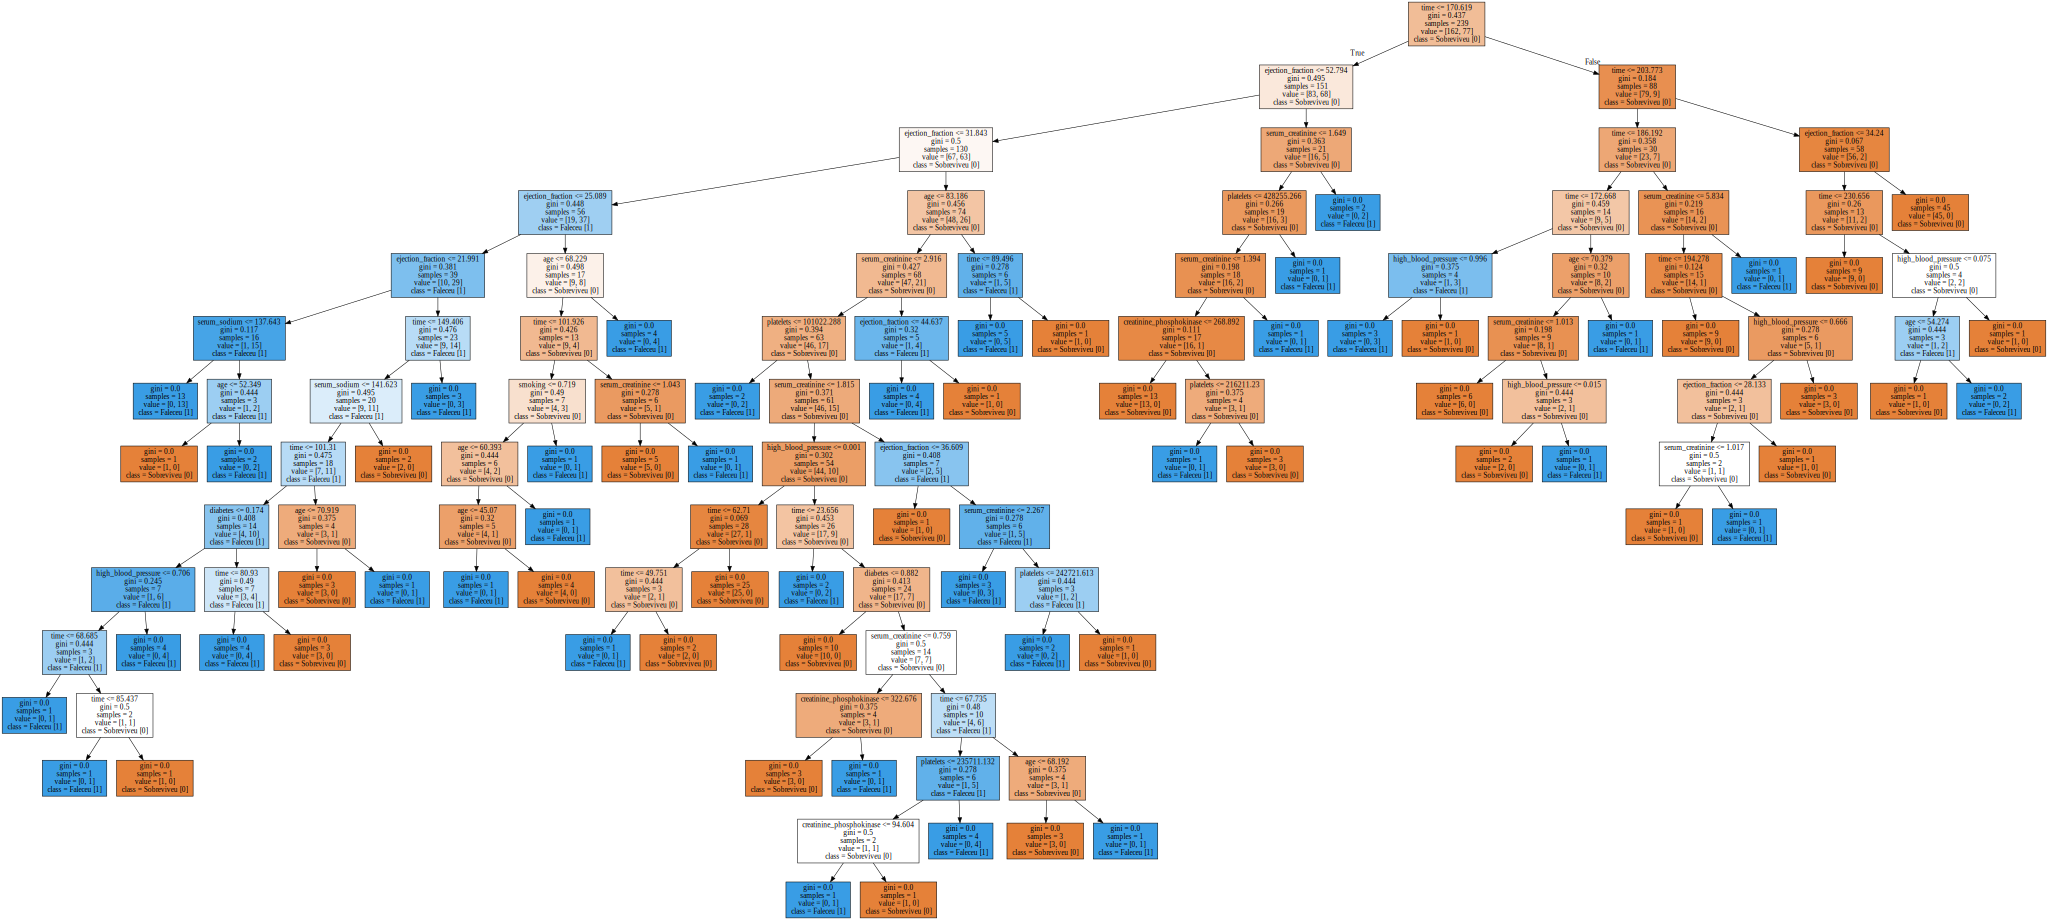

In [27]:
import warnings
warnings.filterwarnings('ignore')
#@title
#renderizando a arvore de forma interativa
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source
from sklearn.metrics import accuracy_score

#feature labels
features_label = X.columns

#class label
class_label = ['Sobreviveu [0]', 'Faleceu [1]']

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf):
  estimator = DecisionTreeClassifier(
      random_state = 1,
      criterion = crit,
      splitter = split,
      max_depth = depth,
      min_samples_split = min_samples_split,
      min_samples_leaf = min_samples_leaf
  )

  #treinamento
  estimator.fit(X_train, y_train)

  graph = Source(export_graphviz(estimator,
                               out_file=None,
                               feature_names=features_label,
                               class_names=class_label,
                               impurity=True,
                               filled = True), filename='tree.png', format='png')
  
  #infos
  infos = ('Criterio:', crit, ' | ', 'Splitter:', split, ' | ', 'Max_depth:', depth, ' | ', 'min_samples_split:', min_samples_split, ' | ', 'min_samples_leaf:', min_samples_leaf)

  #teste
  resultado = estimator.predict(X_test)
  metricas = metrics.classification_report(y_test, resultado)

  return [accuracy_score(y_test, resultado), metricas, infos, graph]

crits = ['entropy', 'gini']
splits = ['best', 'random']
depths = [None,1,2,3,4,5,10]
msps = [2,3,4,5]
msls = [1,2,3,4,5]

best = [0]
worst = [1]

for crit in crits:
  for split in splits:
    for depth in depths:
      for msp in msps:
        for msl in msls:
          result = plot_tree(crit, split, depth, msp, msl)
          if (result[0] > best[0]):
            best = result

          if (result[0] < worst[0]):
            worst = result

print("Melhor Árvore de Decisão")
print(best[2])
print(best[1])
display(SVG(best[3].pipe(format='svg')))

print("Pior Árvore de Decisão")
print(worst[2])
print(worst[1])
display(SVG(worst[3].pipe(format='svg')))

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier()

#treinando o modelo
clf2 = clf2.fit(X_train, y_train)

#Predição
resultado2 = clf2.predict(X_test)

#Resultado
print(metrics.classification_report(y_test, resultado2))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        41
           1       0.40      0.21      0.28        19

    accuracy                           0.65        60
   macro avg       0.55      0.53      0.52        60
weighted avg       0.60      0.65      0.61        60



## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier()

#treinando o modelo
clf3 = clf3.fit(X_train, y_train)

#Predição
resultado3 = clf3.predict(X_test)

#Resultado
print(metrics.classification_report(y_test, resultado3))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60

